# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
data = pd.read_csv('/content/drive/My Drive/DSBA Notebooks//Project 1/foodhub_order.csv')
df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations: The DataFrame has 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Order ID, Customer ID, Food Preparation Time, and Delivery Time are all integers, while the Cost of the Order is a floating point. The Restaurant Name, Cuisine Type, Day of the Week, and Rating are string objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: Thankfully, there is no missing data in this DataFrame, but that does not necessarily mean that all of the data is accurate. There will still need to be checks for sanity and reasonability.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum amount of time it takes for food to be prepared once an order is placed is 20 minutes, the average is 27.372 minutes, and the maximum is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders for which the rating is not given.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **!!Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

CAT COLs: order id, cust id, restaurant name, cuisine type, day of the week, rating

NUM COLs: cost of order, delivery time, prep time

In [ ]:
# ORDER ID - arbitrary
df['order_id'].nunique()

1898

The order ID is largely arbitrary, but I see there are 1898 values for order ID, which means that there is no missing data in this column. From checking the head of the file, I also see that the IDs do not start at 0 or any specific index, nor do they proceed in any particular order, because they are from different restaurants, and the online portal seems to keep the original order IDs.

In [ ]:
# CUSTOMER ID - arbitrary, but there are some duplicates aka returning customers
df['customer_id'].nunique()

1200

While there aren't missing values from this column, there are repeat customers, which accounts for the lesser number of unique customer IDs.

In [ ]:
# RESTAURANT NAME
df['restaurant_name'].nunique()

178

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


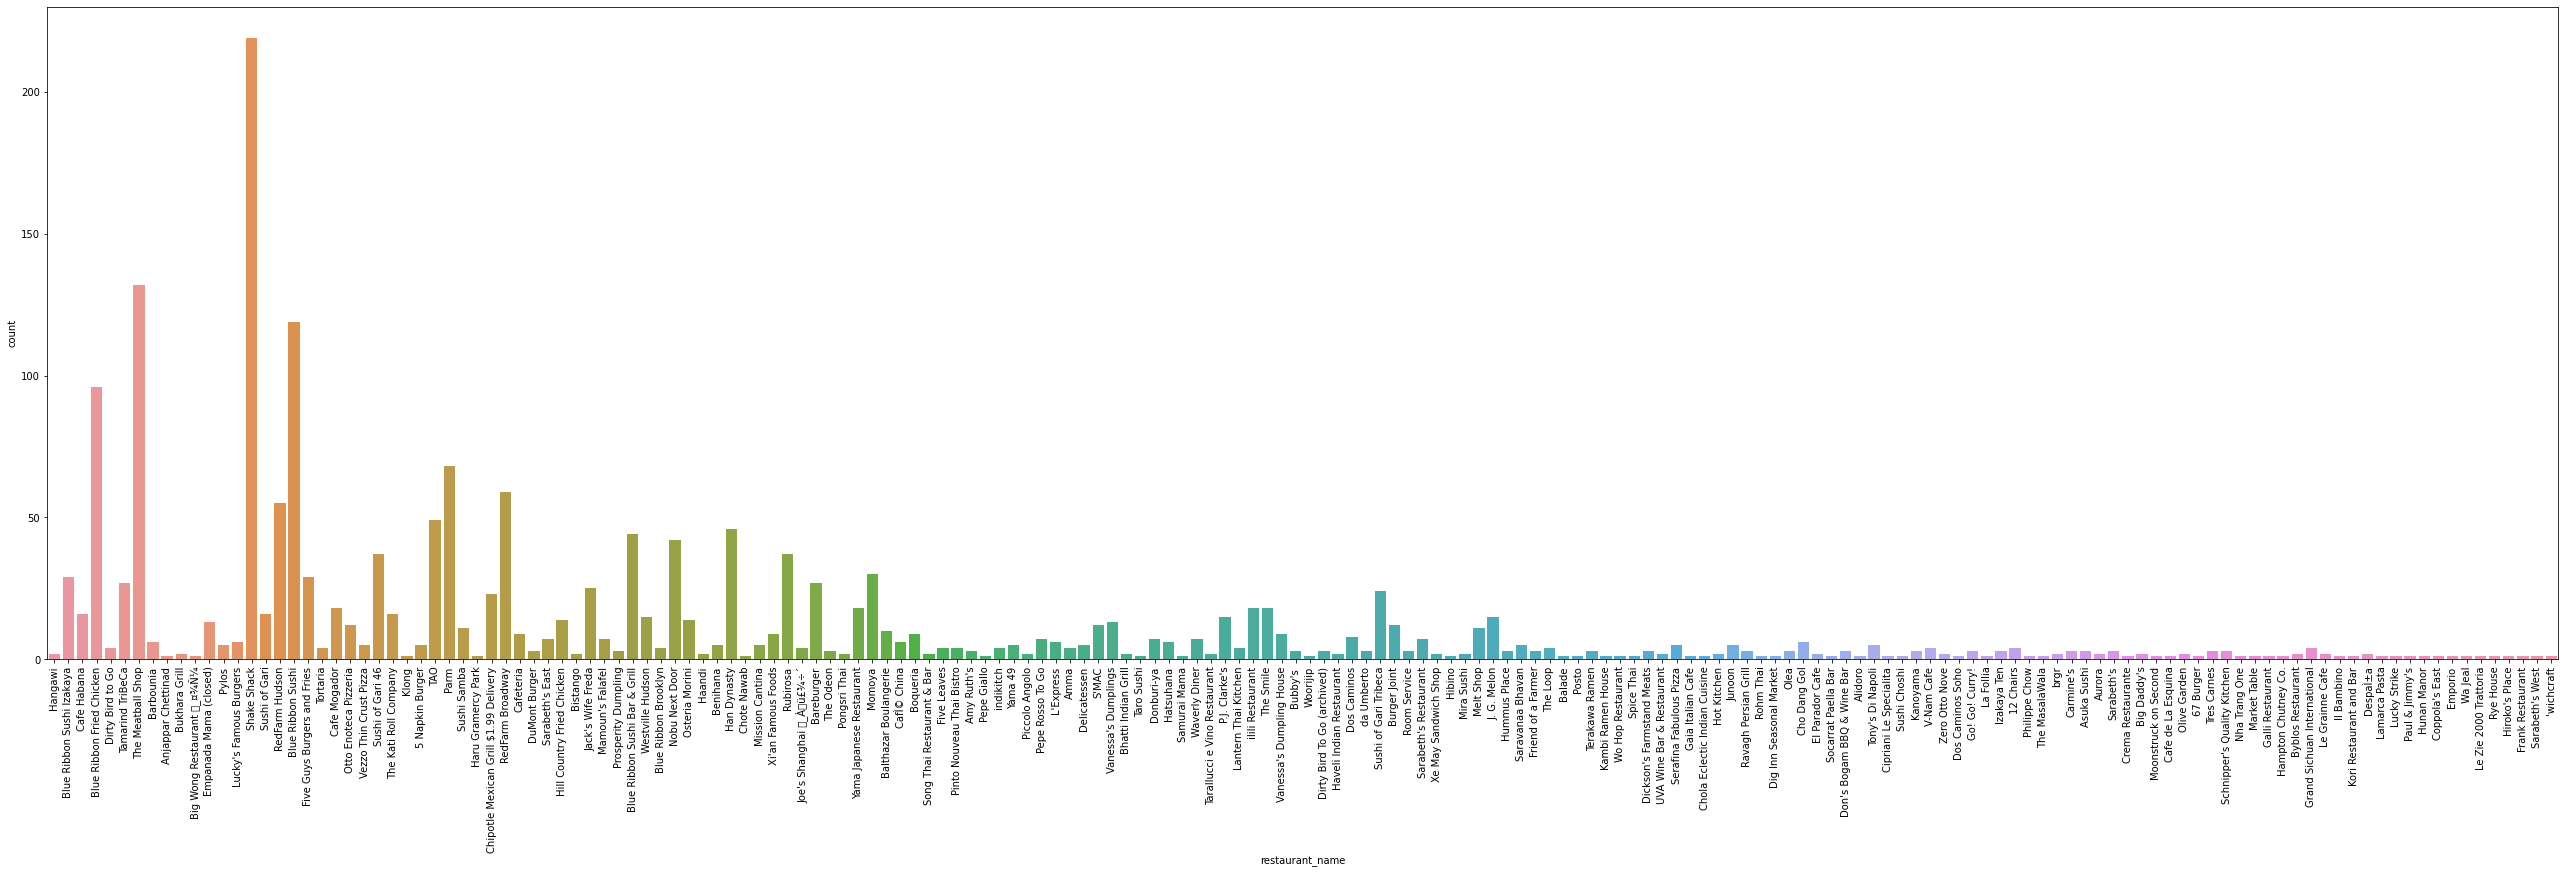

In [ ]:
plt.figure(figsize=(45,12))
sns.countplot(data = df, x='restaurant_name')
plt.xticks(rotation = 90)
plt.show()

There are 178 unique restaurants listed in the dataframe, so many of them are repeated. From the countplot, I can visualize the most popular restaurants quickly, as well as their demand in comparison to other restaurants.

In [ ]:
# CUISINE TYPE
df['cuisine_type'].nunique()

14

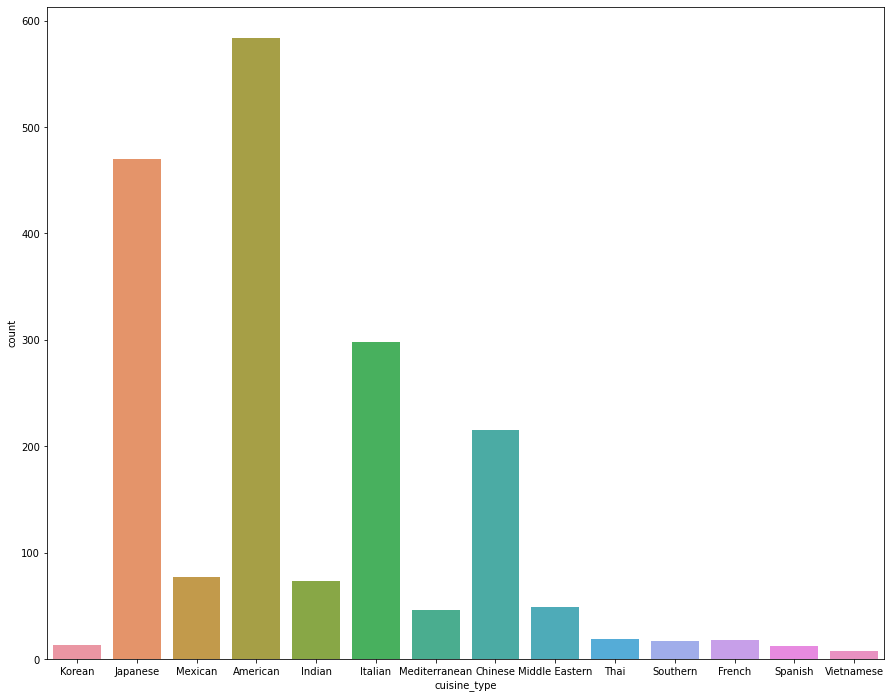

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(data=df, x='cuisine_type')

There are 14 unique cuisine types represented in the dataframe, with American, Japanese, and Italian being the most popular. Korean and Vietnamese are the least popular.

In [ ]:
# DAY OF THE WEEK
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
df['day_of_the_week'].value_counts()[0] - df['day_of_the_week'].value_counts()[1]

804

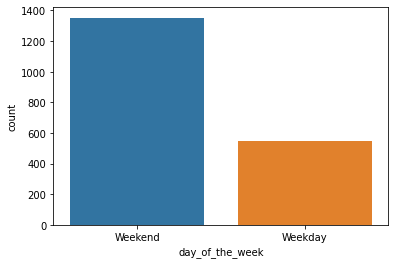

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

While the column is called 'Day of the Week', it really only gets as specific as whether the order was placed on a weekday or on the weekend. Weekends are much more popular, with 804 more orders placed on the weekend than a weekday.

In [ ]:
# RATING
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

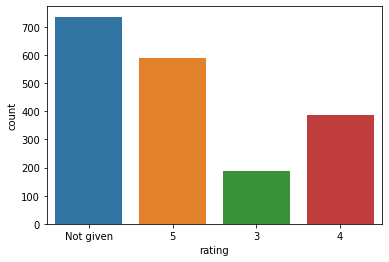

In [ ]:
sns.countplot(data=df, x='rating');

Most of the ratings are Not Given, with a 5 being the next most popular rating. It is interesting to me that there are no ratings below 3, but I understand that there is a phenomenon wherein people typically only engage in activities like signing up for apps or leaving reviews if they are well-established with the business and like the business. There are also no missing values, so I must assume that this is not unintentional.

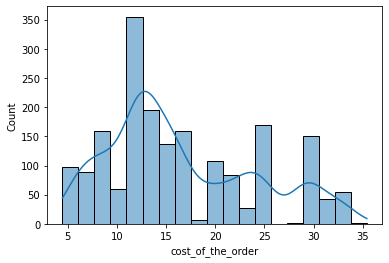

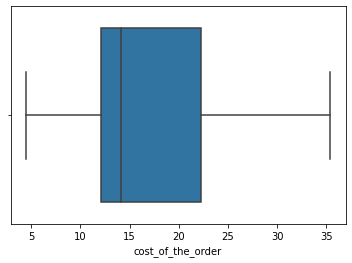

In [ ]:
# COST OF THE ORDER
sns.histplot(data=df, x='cost_of_the_order', kde = True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

The costs of orders is slightly right-skewed, and 75% of orders are below approximately 23 dollars. The most expensive order was 35 dollars, while the cheapest was 5 dollars. 50% of orders are between about 12 dollars and 23 dollars.

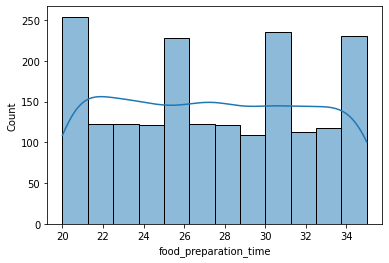

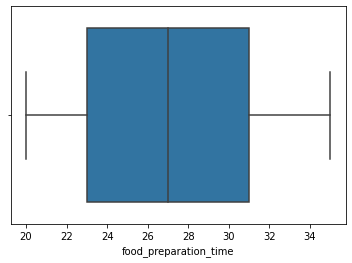

In [ ]:
# FOOD PREPARATION TIME
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

Food preparation time is pretty normally distributed, with the average time taking 27 minutes. 50% of orders are prepared within 23 to 31 minutes, with the fastest preparation happening in 20 minutes and the slowest taking 35 minutes.

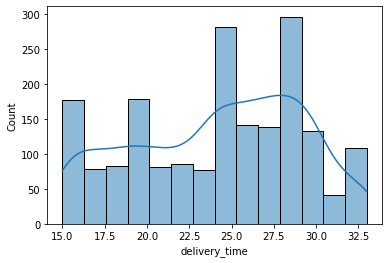

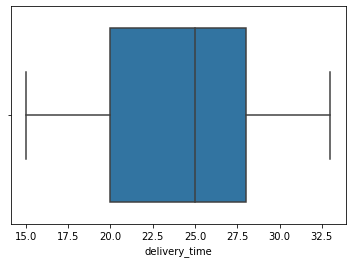

In [ ]:
# DELIVERY TIME
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

Delivery time is slightly left-skewed, with the average time to deliver taking about 24 minutes. 50% of orders took 20 to 28 minutes to deliver, with the slowest delivery taking about 33 minutes and the fastest taking 15 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants in number of orders received are, in descending order, Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekends = df[df['day_of_the_week'] == 'Weekend']
weekends['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American food is the most popular on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
orders_over_20 = df[df['cost_of_the_order'] > 20]
orders_over_20.shape
percent_over_20 = (orders_over_20.shape[0] / df.shape[0]) * 100
percent_over_20

29.24130663856691

#### Observations: 29% of all orders placed cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: The average time to deliver an order is 24.26 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The top 3 most frequent customers are Customer 52832 with 13 orders, Customer 47440 with 10 orders, and Customer 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### NUM vs NUM:
* cost / delivery_time
* cost / food_prep_time
* delivery_time / food_prep_time

### NUM vs CAT:
* restaurant / cost
* restaurant / delivery_time
* restaurant / food_prep

* cuisine / cost
* cuisine / delivery_time
* cuisine / food_prep_time

* day / cost
* day / delivery_time
* day / food_prep

* rating / cost
* rating / delivery_time
* rating / food_prep

### CAT vs CAT:
* cuisine / day
* cuisine / rating
* day / rating

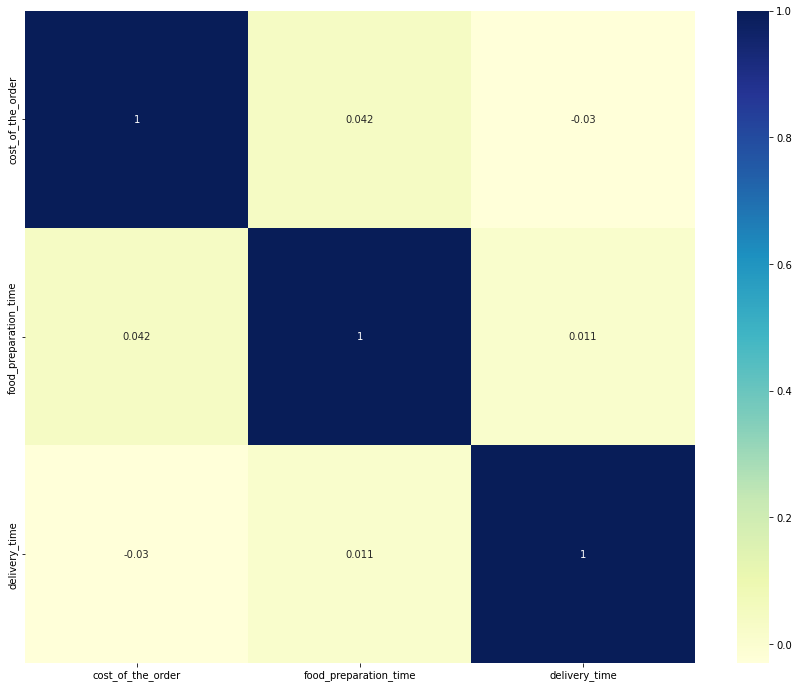

In [ ]:
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (15,12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu');
# numerical values don't seem to have a notable correlation to each other

My initial inclination was to think that the cost of the order would at least be affected by the preparation time and/or delivery time, but there is no notable correlation between these variables.

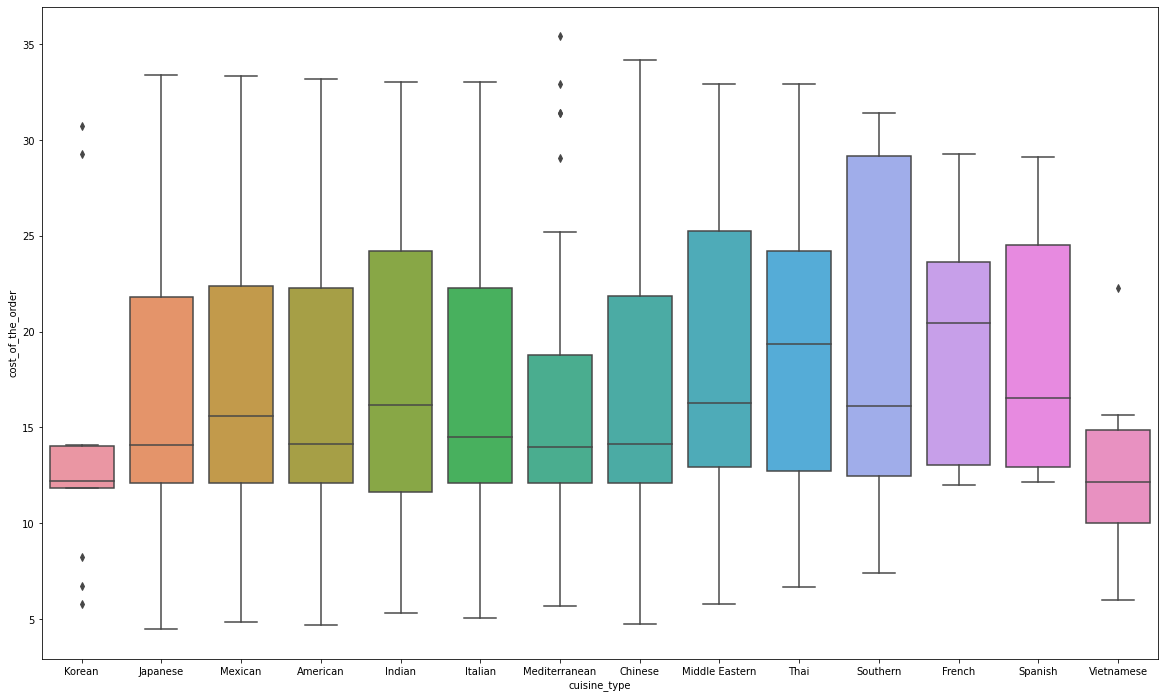

In [ ]:
# CUISINE TYPE vs NUM COLS
plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.show()

In [ ]:
df.groupby(['cuisine_type'])['cost_of_the_order'].describe().T

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
count,584.000000,215.000000,18.000000,73.000000,298.000000,470.000000,13.000000,46.000000,77.000000,49.000000,17.000000,12.000000,19.000000,7.000000
mean,16.319829,16.305209,19.793889,16.919726,16.418691,16.304532,14.001538,15.474783,16.933117,18.820612,19.300588,18.994167,19.207895,12.882857
std,7.462290,7.631503,6.508990,7.897493,7.268831,7.422722,7.563540,7.604720,7.555108,8.086499,7.966032,6.658207,7.579149,5.319623
min,4.710000,4.750000,11.980000,5.340000,5.050000,4.470000,5.770000,5.670000,4.850000,5.770000,7.380000,12.130000,6.690000,6.010000
25%,12.080000,12.105000,13.052500,11.640000,12.080000,12.080000,11.840000,12.092500,12.080000,12.950000,12.470000,12.915000,12.710000,10.020000
50%,14.120000,14.120000,20.470000,16.150000,14.480000,14.070000,12.180000,13.995000,15.570000,16.300000,16.110000,16.520000,19.350000,12.130000
75%,22.260000,21.880000,23.655000,24.200000,22.260000,21.830000,14.020000,18.782500,22.360000,25.270000,29.150000,24.492500,24.200000,14.870000
max,33.180000,34.190000,29.250000,33.030000,33.030000,33.370000,30.750000,35.410000,33.320000,32.930000,31.430000,29.100000,32.930000,22.260000


I notice there are some outliers in the data (i.e. cost of Korean, Mediterranean, and Vietnamese orders), so I will keep an eye out for any indication in the other variables about why that may be. Mediterranean stands with the most expensive order, just over 35 dollars, while Japanese has the cheapest, at about 4.47 dollars. French averages as the most expensive meals to order, at just over 20 dollars.

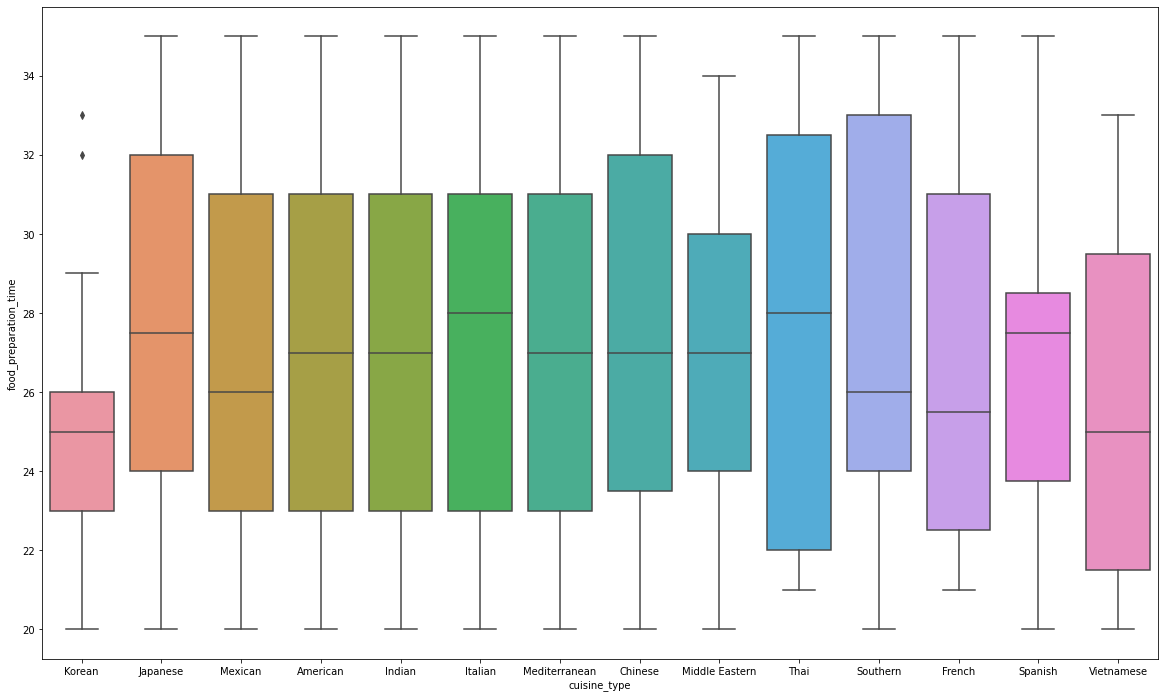

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');
plt.show()

In [ ]:
df.groupby(['cuisine_type'])['food_preparation_time'].describe().T

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
count,584.000000,215.000000,18.000000,73.000000,298.000000,470.000000,13.000000,46.000000,77.000000,49.000000,17.000000,12.000000,19.000000,7.000000
mean,27.440068,27.511628,26.888889,27.109589,27.483221,27.510638,25.461538,27.000000,26.727273,26.673469,27.588235,26.916667,27.315789,25.714286
std,4.658474,4.758525,5.039712,4.620491,4.519474,4.604496,3.971049,4.908043,4.604450,4.012417,5.523346,4.501683,5.498006,5.154748
min,20.000000,20.000000,21.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,21.000000,20.000000
25%,23.000000,23.500000,22.500000,23.000000,23.000000,24.000000,23.000000,23.000000,23.000000,24.000000,24.000000,23.750000,22.000000,21.500000
50%,27.000000,27.000000,25.500000,27.000000,28.000000,27.500000,25.000000,27.000000,26.000000,27.000000,26.000000,27.500000,28.000000,25.000000
75%,31.000000,32.000000,31.000000,31.000000,31.000000,32.000000,26.000000,31.000000,31.000000,30.000000,33.000000,28.500000,32.500000,29.500000
max,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,33.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.000000,33.000000


The outliers in the Korean, Mediterranean, and Vietnamese columns of "cost of the order" correspond pretty consistently to their food preparation times, in comparison to other cuisine types, so I'm no longer worried about them needing to be treated for inaccuracy. It appears that there may be a set minimum and maximum preparation time set, as many of the cuisine types are tied for both fastest and slowest preparations at 20 and 35 minutes, respectively. However, Thai and French orders appear to take at least 21 minutes each, and Vietnamese and Korean foods only take up to 33 minutes to prepare. Southern food barely averaged the longest to prepare, at 27.59 minutes.

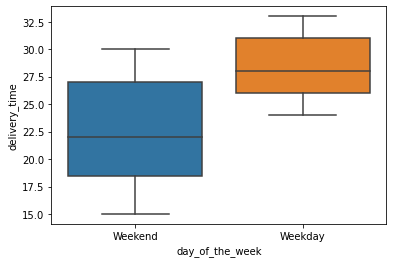

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');
plt.show()

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].describe().T

day_of_the_week,Weekday,Weekend
count,547.000000,1351.000000
mean,28.340037,22.470022
std,2.891428,4.628938
min,24.000000,15.000000
25%,26.000000,18.500000
50%,28.000000,22.000000
75%,31.000000,27.000000
max,33.000000,30.000000


Weekday deliveries definitely take longer than weekend deliveries, likely due to weekday traffic. The average time to deliver on weekends is 22 minutes, while the average delivery time on weekdays is 28 minutes. The longest delivery on the weekend was 30 minutes, while the longest delivery on the weekdays was 33 minutes. 50% of deliveries on weekends take between 18.5 and 27 minutes, while 50% of deliveries on weekdays take between 26 and 31 minutes.

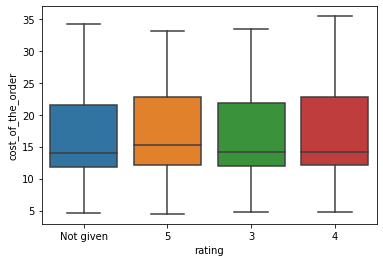

In [ ]:
# RATING vs NUM COLs
sns.boxplot(data=df, x='rating', y='cost_of_the_order');
plt.show()

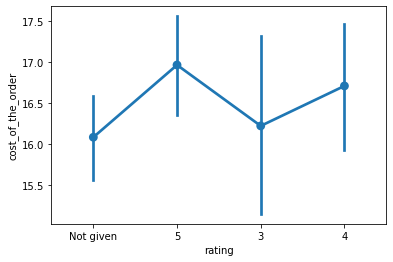

In [ ]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order')

It appears that the rating given to an order only slightly depends on the cost of the order, with the cost of the order generally having a positive correlation with the rating given to it. This is a very slight relationship, but is pretty consistent.

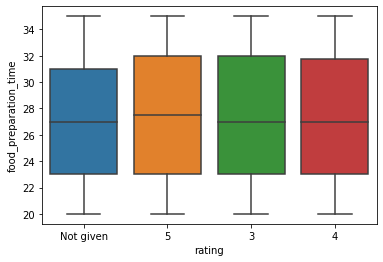

In [ ]:
sns.boxplot(data=df, x='rating', y='food_preparation_time');
plt.show()

It also looks like the orders given a 5 actually tend to take a bit longer to prepare, on average, than other meals. This may be because it is a fancier or more conplex meal.

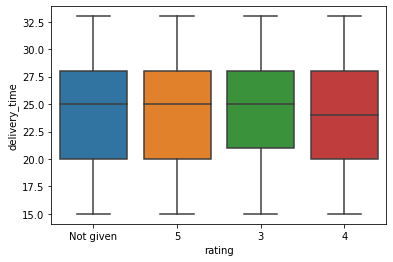

In [ ]:
sns.boxplot(data=df, x='rating', y='delivery_time');
plt.show()

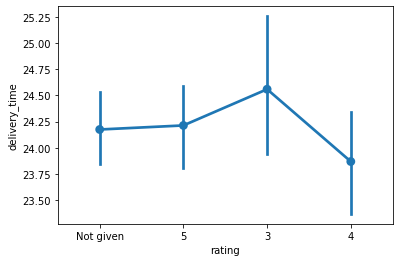

In [ ]:
sns.pointplot(data=df, x='rating', y='delivery_time')

Oddly, it appears that delivery time does not have a strong, consistent correlation to rating, contrary to my initial belief. 5-rated orders are delivered in less average time than 3-rated orders, yes, but 4-rated orders are delivered in generally less time than 5-rated orders.

In [ ]:
# creating new variable 'total time' to analyze how total time to make & deliver meal affects other variables
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


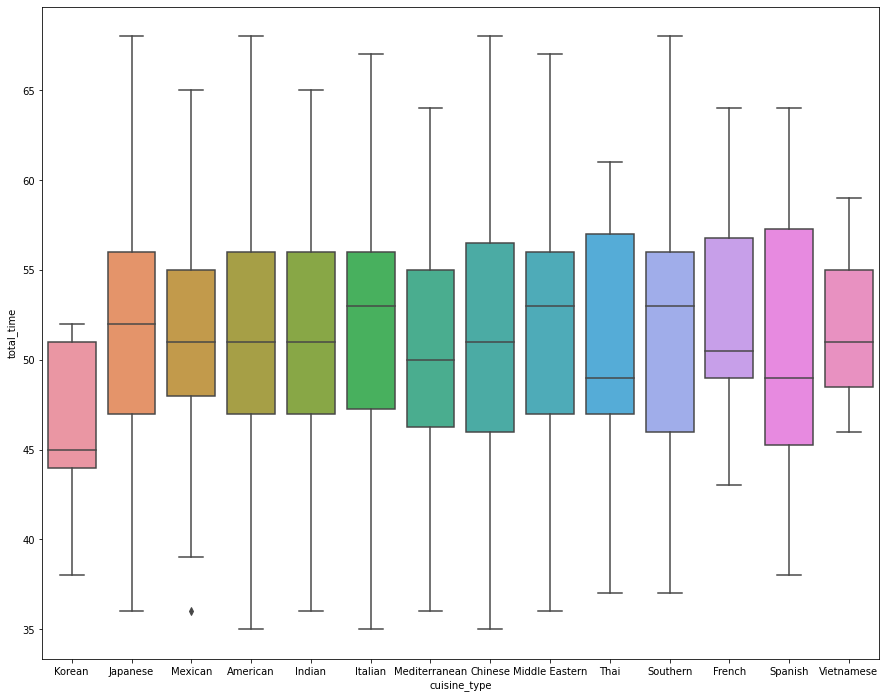

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df, x='cuisine_type', y='total_time');
plt.show()

In [ ]:
df.groupby(['cuisine_type'])['total_time'].describe().T

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
count,584.000000,215.000000,18.000000,73.000000,298.000000,470.000000,13.000000,46.000000,77.000000,49.000000,17.000000,12.000000,19.000000,7.000000
mean,51.633562,51.367442,52.222222,51.191781,52.050336,51.642553,46.384615,50.586957,51.116883,50.755102,51.411765,50.333333,50.473684,51.857143
std,6.616107,7.362437,6.025002,6.520603,6.764496,6.993440,4.519190,7.206713,5.891506,7.221296,8.602753,8.060378,7.152066,4.740906
min,35.000000,35.000000,43.000000,36.000000,35.000000,36.000000,38.000000,36.000000,36.000000,36.000000,37.000000,38.000000,37.000000,46.000000
25%,47.000000,46.000000,49.000000,47.000000,47.250000,47.000000,44.000000,46.250000,48.000000,47.000000,46.000000,45.250000,47.000000,48.500000
50%,51.000000,51.000000,50.500000,51.000000,53.000000,52.000000,45.000000,50.000000,51.000000,53.000000,53.000000,49.000000,49.000000,51.000000
75%,56.000000,56.500000,56.750000,56.000000,56.000000,56.000000,51.000000,55.000000,55.000000,56.000000,56.000000,57.250000,57.000000,55.000000
max,68.000000,68.000000,64.000000,65.000000,67.000000,68.000000,52.000000,64.000000,65.000000,67.000000,68.000000,64.000000,61.000000,59.000000


The cuisine that took the least average total time to get to customers was Korean food, while the most average total time was French food. American, Chinese, and Italian had the quickest total times, at 35 minutes. The longest total times were also held by American and Chinese, as well as Japanese and Southern at 68 minutes.

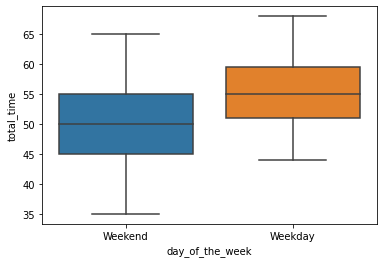

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='total_time');
plt.show()

Total time to get orders to customers went up on weekdays, as is corroborated by the delivery times previously displayed.

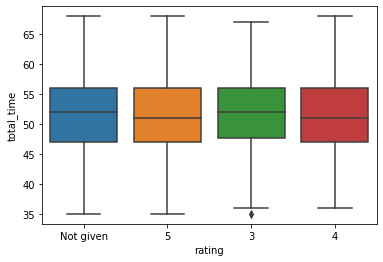

In [ ]:
sns.boxplot(data=df, x='rating', y='total_time');
plt.show()

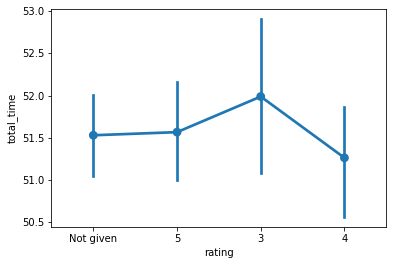

In [ ]:
sns.pointplot(data=df, x='rating', y='total_time')

The ratings also follow the same trends for total time as they did for delivery time, which makes sense.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rated = df[df['rating'] != 'Not given'].copy()

rated_count = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rated_count.head()

rated['rating'] = rated['rating'].astype('int')

rated_names = rated_count[rated_count['rating'] > 50]['restaurant_name']
rated_names

rated_means = rated[rated['restaurant_name'].isin(rated_names)].copy()
rated_means.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: The Restaurants fulfiiling the criteria to get the promotion are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def revenue(order):
  if (order > 20):
    return order * 0.25
  elif (order > 5):
    return order * 0.15
  else:
    return 0

# revenue(25) check accuracy - good
df['revenue'] = df['cost_of_the_order'].apply(revenue)
# df.head()

total_revenue = df['revenue'].sum()
total_revenue

6166.303

#### Observations: The net revenue generated by the company across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
over_hr_orders = df[df['total_time'] > 60]
percent_over_hr = (over_hr_orders.shape[0] / df.shape[0]) * 100
percent_over_hr

10.537407797681771

#### Observations: The percent of orders that take more than an hour from order placement to order delivery is 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()[0] - df.groupby(['day_of_the_week'])['delivery_time'].mean()[1]

5.870014357297798

#### Observations: The delivery time varies by 5.87 minutes, with weekends taking less time to deliver.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most orders cost between 12 dollars and 22 dollars, with the average cost being $16.
* It took a minimum of 20 minutes to prep an order and a maximum of 35 minutes.
* It took a minimum of 15 minutes to deliver an order and a maximum of 33 minutes.
* The average time to prep an order was 27 minutes.
* Surprisingly, it does not appear that there is a notable correlation between order ratings and prep or delivery time. There is, however, a slight positive correlation between the rating and the cost of the order.
* There is no correlation between the cost of the order and the prep or delivery times, interestingly.
* Almost 40% of orders are not rated.
* 2 Blue Ribbon restaurants are in the top 5 most popular restaurants, with several other Blue Ribbon restaurants trailing close behind.
* American, Japanese, and Italian cuisines are most popular and most highly rated, both on weekends and overall.
* Weekends are most popular for orders.
* Most orders took 23 - 29  minutes to deliver, with many taking longer than the 24 minute average.
* The customers who repeatedly used the app only used it up to 13 times.
* Mediterranean occasionally had the most expensive orders, but French averaged the most expensive.
* Japanese orders had the 2nd least expensive orders, but it is also the 2nd most popular cuisine, which may make up for the lower cost of orders.
* Southern cuisine averages the longest to prepare, with Japanese and Chinese close behind.
* Deliveries on weekdays take much longer, likely because of work week traffic.
* Korean cuisine took, by far, the least amount of time to prepare and deliver.
* It appears there is a positive correlation between highly rated and most popular restaurants.

### Recommendations:

*  Depending on whether there are bottom limits placed on the app for restaurants to log their preparation time, it may be good to incentivise restaurant staff to lower the preparation time to increase the capacity for orders.
* The company should invest in advertising for and continuing to expand their partnership with the Blue Ribbon franchise, as it consistently produces the best performing restaurants among all others in the app.
* American, Japanese, and Italian restaurants would be great invesments by the company, as these are the most popular cuisines in the app.
* Combining more efficient delivery routes or better map API with promotion of the convenience of food delivery after long days at work may help boost the weekday orders, given that delivery times are higher on weekdays.
* It may be good to investigate the lack of 1's and 2's in the ratings, if at least to understand what further issues can be improved on. This may also help fill in the data where there seems to be no correlations between rating and other variables.

---